In [63]:
import pandas as pd  
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer  # For handling missing values
import os  # For file handling
import scipy.stats as stats
import cv2  # For image processing
from PIL import Image  # Alternative to OpenCV for image handling
import matplotlib.pyplot as plt  # For plotting images and data distributions
import seaborn as sns  
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For image augmentation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [65]:
df_rice='All_Images'

In [67]:
# List all subdirectories (classes) in the data directory
classes = [cls for cls in os.listdir(df_rice) if os.path.isdir(os.path.join(df_rice, cls))]
print("Classes:", classes)

# Count the number of images in each class
class_counts = {}
for cls in classes:
    class_dir = os.path.join(df_rice, cls)
    class_counts[cls] = len([img for img in os.listdir(class_dir) if not img.startswith('.')])  # Ignore hidden files

print("Class counts:", class_counts)

Classes: ['Karacadag', 'Ipsala', 'Arborio', 'Basmati', 'Jasmine']
Class counts: {'Karacadag': 15000, 'Ipsala': 15000, 'Arborio': 15000, 'Basmati': 15000, 'Jasmine': 15000}


In [69]:
img_size = 227  # AlexNet input size
batch_size = 32

In [71]:
# Load dataset statistics
image_paths = []
labels = []
for label in os.listdir(df_rice):
    label_path = os.path.join(df_rice, label)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            image_paths.append(os.path.join(label_path, img_file))
            labels.append(label)

In [73]:
df_rice_new = pd.DataFrame({"image_path": image_paths, "label": labels})
print("Dataset Statistics:")
print(df_rice_new['label'].value_counts())

Dataset Statistics:
label
Karacadag    15000
Ipsala       15000
Arborio      15000
Basmati      15000
Jasmine      15000
Name: count, dtype: int64


In [75]:
# Check for missing data
print("Missing Values:")
print(df_rice_new.isnull().sum())

Missing Values:
image_path    0
label         0
dtype: int64


In [77]:
# Statistical Analysis using Z-score and T-test
# Convert labels to numeric values
label_counts = df_rice_new['label'].value_counts()
mean_count = np.mean(label_counts)
std_dev = np.std(label_counts)

In [79]:
print(label_counts)

label
Karacadag    15000
Ipsala       15000
Arborio      15000
Basmati      15000
Jasmine      15000
Name: count, dtype: int64


In [81]:
print(mean_count)

15000.0


In [83]:
print(std_dev)

0.0


In [85]:
# Compute Z-scores to identify outliers
z_scores = (label_counts - mean_count) / std_dev
print("Z-scores for label distributions:")
print(z_scores)

Z-scores for label distributions:
label
Karacadag   NaN
Ipsala      NaN
Arborio     NaN
Basmati     NaN
Jasmine     NaN
Name: count, dtype: float64


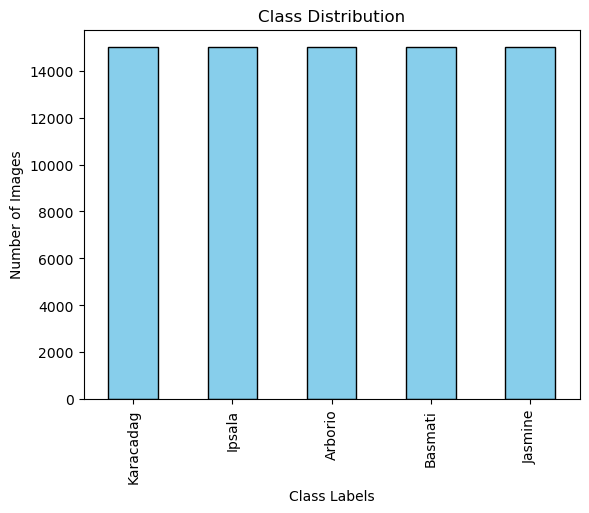

In [93]:
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.show()

In [95]:
from scipy.stats import chisquare

chi_stat, p_value = chisquare(label_counts)
print(f"Chi-Square Statistic: {chi_stat}, p-value: {p_value}")

if p_value > 0.05:
    print("Dataset is evenly distributed (fail to reject null hypothesis).")
else:
    print("Dataset may have some imbalance (reject null hypothesis).")


Chi-Square Statistic: 0.0, p-value: 1.0
Dataset is evenly distributed (fail to reject null hypothesis).
